In [1]:
print("Hello World!")

Hello World!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
%matplotlib inline

/home/gk/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")
path+="/Customers.csv"
print("Path to dataset files:", path)

Path to dataset files: /home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


In [4]:
print(path)
sales_data=pd.read_csv(path,index_col='CustomerID')
sales_data

/home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [5]:
def gradient_calc(W,X,b,Y):
    w_gradient_sum=0
    b_gradient_sum=0
    for i in range(X.shape[0]):
        w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
        b_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])
    return w_gradient_sum/len(X),b_gradient_sum/len(X)

In [6]:
def calculate_cost(W,X,b,Y):
    cost=0

    for i in range(X.shape[0]):
        cost+=((np.dot(W,X[i])+b)-Y[i])**2
    return cost/len(X)*2    

In [7]:
def gradient_descent_calc(W,X,b,Y,alpha,error_margin,iterations):
    
    if len(W)==0:
        weights = np.random.rand(X.shape[1])  # Initialize weights with the number of features
    else:
        weights = W

    if len(b) ==0:  
        biases = np.random.rand(1)[0]  
    else:
        biases = b
    print(f"Initial W: {weights} Initial B: {biases}")   
    cost_history=[]
    m,n=X.shape
    iter_count=0
    while iter_count!=iterations:
        cost_value=calculate_cost(weights,X,biases,Y)
        cost_history.append(cost_value)
        if cost_value<=error_margin:
            print("Error margin reached")
            break
        new_w,new_b=gradient_calc(weights,X,biases,Y)
        weights=weights - alpha * new_w
        biases=biases - alpha * new_b
        iter_count+=1
        print(weights,biases,cost_value,iter_count)
    
    
    return weights,biases,cost_history

    

In [8]:
# X_train = np.array([[1], [2], [3], [4]])  # 4 training samples
# Y_train = np.array([2, 3, 5, 7])

# X_train = np.array([[1, 2],
#                     [2, 3],
#                     [3, 4],
#                     [4, 5],
#                     [5, 6]])

# # Corresponding target values
# Y_train = np.array([3, 5, 7, 9, 11])

X_train = np.array([[1**2],  # 1, 1, 1
                    [2**2],  # 4, 8, 16
                    [3**2],  # 9, 27, 81
                    [4**2],  # 16, 64, 256
                    [5**2]]) # 25, 125, 625

# Corresponding target values
Y_train = np.array([2, 3, 4, 5, 6])  # You can set any desired pattern

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,0.00002,0.01,2000)
predicted_x=np.dot(predicted_w,[25**2])+predicted_b
print(f"predicted x is {predicted_x} ")
print(f"line eqn: {predicted_w}x+{predicted_b})")
print(f"final cost is {cost_history[-1]}, predicted w :{predicted_w} and predicted b :{predicted_b}")
# for i in cost_history:
#     print(f"{i}\n")

Initial W: [0.66925894] Initial B: 0.02938845926544098
[0.66775165] 0.02932063453007967 61.883510386326336 1
[0.66625029] 0.02925314275357404 61.42910384699369 2
[0.66475482] 0.029185982627427352 60.97826000966221 3
[0.66326522] 0.029119152848283147 60.53095093799865 4
[0.66178146] 0.029052652117905052 60.08714891472787 5
[0.66030353] 0.028986479143156673 59.64682643991513 6
[0.65883141] 0.02892063263598155 59.20995622926203 7
[0.65736506] 0.028855111313383214 58.77651121241537 8
[0.65590447] 0.028789913897405296 58.34646453128975 9
[0.65444962] 0.028725039115111737 57.919789538402924 10
[0.65300047] 0.02866048569856706 57.49645979522455 11
[0.65155702] 0.028596252384816737 57.07644907053763 12
[0.65011923] 0.0285323379158676 56.65973133881293 13
[0.64868709] 0.028468741038668373 56.24628077859618 14
[0.64726056] 0.028405460505090255 55.83607177090769 15
[0.64583964] 0.02834249507190757 55.42907889765477 16
[0.6444243] 0.02827984350077851 55.02527694005661 17
[0.64301451] 0.02821750455

[0.46572024] 0.021196714510399672 16.81206242654823 192
[0.46501182] 0.021173832123016573 16.710990018430117 193
[0.46430617] 0.021151106046504515 16.610709702310288 194
[0.4636033] 0.02112853566630855 16.511215267136812 195
[0.46290318] 0.021106120370287945 16.412500550560736 196
[0.46220581] 0.021083859548706688 16.314559438554134 197
[0.46151117] 0.021061752594224055 16.21738586503123 198
[0.46081926] 0.021039798901885187 16.120973811472453 199
[0.46013006] 0.021017997869111727 16.025317306551464 200
[0.45944357] 0.02099634889569248 15.930410425765093 201
[0.45875977] 0.020974851383774116 15.836247291066178 202
[0.45807865] 0.020953504737851902 15.742822070499312 203
[0.4574002] 0.020932308364760486 15.650128977839373 204
[0.45672442] 0.020911261673664694 15.55816227223301 205
[0.45605129] 0.02089036407605039 15.466916257842797 206
[0.45538079] 0.020869614985715348 15.37638528349429 207
[0.45471293] 0.02084901381876017 15.286563742325782 208
[0.45404769] 0.020828559993579247 15.1974

[0.36837516] 0.019062603180624936 6.650366334874997 389
[0.3680484] 0.01906117939434546 6.62888655087814 390
[0.36772293] 0.01905982752173569 6.607574747794618 391
[0.36739874] 0.019058547279786026 6.586429608436662 392
[0.36707581] 0.01905733838659864 6.565449825944988 393
[0.36675415] 0.019056200561383102 6.544634103707859 394
[0.36643375] 0.019055133524452046 6.523981155280678 395
[0.3661146] 0.019054136997216833 6.503489704306304 396
[0.3657967] 0.019053210702183222 6.483158484435947 397
[0.36548005] 0.019052354362947083 6.462986239250656 398
[0.36516464] 0.019051567704190114 6.44297172218352 399
[0.36485047] 0.01905085045167557 6.423113696442352 400
[0.36453752] 0.019050202332244016 6.403410934933062 401
[0.3642258] 0.0190496230738091 6.383862220183632 402
[0.3639153] 0.01904911240535333 6.364466344268643 403
[0.36360602] 0.019048670056923882 6.345222108734427 404
[0.36329795] 0.01904829575962841 6.326128324524786 405
[0.36299108] 0.01904798924563088 6.307183811907318 406
[0.36268

[0.3226965] 0.019916456379947097 4.463820708740731 591
[0.32254844] 0.019925064820654682 4.459395747845031 592
[0.32240096] 0.01993370566263927 4.455005036660398 593
[0.32225405] 0.019942378778111863 4.450648306630207 594
[0.32210771] 0.019951084039785485 4.446325291303652 595
[0.32196195] 0.019959821320873185 4.442035726319274 596
[0.32181676] 0.01996859049508609 4.437779349388549 597
[0.32167213] 0.01997739143663144 4.433555900279654 598
[0.32152807] 0.01998622402021064 4.42936512080132 599
[0.32138457] 0.01999508812101732 4.425206754786854 600
[0.32124163] 0.0200039836147354 4.421080548078251 601
[0.32109924] 0.020012910377537173 4.416986248510432 602
[0.32095741] 0.02002186828608137 4.41292360589564 603
[0.32081614] 0.020030857217511255 4.408892372007921 604
[0.32067542] 0.02003987704945273 4.404892300567741 605
[0.32053524] 0.020048927660012438 4.400923147226732 606
[0.32039562] 0.020058008927775862 4.396984669552533 607
[0.32025654] 0.020067120731805454 4.3930766270137935 608
[0.

[0.30230658] 0.02210394280643966 4.0136762944575395 788
[0.30223788] 0.022116993280527387 4.012692964002217 789
[0.30216945] 0.02213005860659914 4.011716897622522 790
[0.30210129] 0.022143138725807032 4.010748038365209 791
[0.30203339] 0.02215623357953437 4.009786329723617 792
[0.30196575] 0.022169343109394727 4.008831715634175 793
[0.30189838] 0.022182467257231043 4.007884140472926 794
[0.30183126] 0.02219560596511473 4.006943549052073 795
[0.30176441] 0.022208759175344768 4.0060098866165745 796
[0.30169781] 0.022221926830446808 4.00508309884073 797
[0.30163147] 0.022235108873172295 4.0041631318248365 798
[0.30156539] 0.02224830524649756 4.003249932091826 799
[0.30149957] 0.022261515893622963 4.00234344658397 800
[0.301434] 0.022274740757971985 4.001443622659581 801
[0.30136868] 0.022287979783190373 4.000550408089749 802
[0.30130362] 0.022301232913145258 3.9996637510551154 803
[0.30123881] 0.022314500091924285 3.9987836001426458 804
[0.30117425] 0.02232778126383475 3.9979099043424595 

[0.29265658] 0.02497542929680869 3.9081257048387905 990
[0.29262504] 0.024990545341279348 3.9078799671859934 991
[0.29259362] 0.025005668021734127 3.907635711268442 992
[0.29256232] 0.025020797311601516 3.9073929254741318 993
[0.29253115] 0.025035933184414404 3.907151598282117 994
[0.29250009] 0.02505107561380964 3.9069117182617887 995
[0.29246914] 0.02506622457352766 3.906673274072168 996
[0.29243832] 0.025081380037412046 3.9064362544612097 997
[0.29240761] 0.025096541979409144 3.9062006482650937 998
[0.29237702] 0.02511171037356765 3.9059664444075404 999
[0.29234655] 0.025126885194038214 3.9057336318991256 1000
[0.29231619] 0.02514206641507303 3.9055021998365937 1001
[0.29228595] 0.02515725401102545 3.9052721374021866 1002
[0.29225583] 0.02517244795634957 3.9050434338629714 1003
[0.29222581] 0.025187648225599855 3.9048160785701755 1004
[0.29219592] 0.025202854793430728 3.9045900609585273 1005
[0.29216613] 0.025218067634596185 3.9043653705456007 1006
[0.29213646] 0.0252332867239494 3.

[0.28845386] 0.02786155980868235 3.879146205643007 1175
[0.28843814] 0.027877542728440893 3.879045463696967 1176
[0.28842249] 0.027893528785809394 3.8789450677790187 1177
[0.28840689] 0.027909517967960016 3.878845015182602 1178
[0.28839135] 0.027925510262115313 3.878745303222381 1179
[0.28837586] 0.027941505655548034 3.8786459292340743 1180
[0.28836044] 0.02795750413558094 3.8785468905742917 1181
[0.28834507] 0.027973505689586585 3.8784481846203747 1182
[0.28832975] 0.027989510304987142 3.878349808770223 1183
[0.2883145] 0.02800551796925419 3.878251760442147 1184
[0.28829929] 0.028021528669908535 3.8781540370746947 1185
[0.28828415] 0.02803754239452001 3.878056636126505 1186
[0.28826906] 0.028053559130707274 3.8779595550761408 1187
[0.28825403] 0.028069578866137635 3.8778627914219364 1188
[0.28823905] 0.028085601588526854 3.8777663426818436 1189
[0.28822413] 0.02810162728563895 3.877670206393276 1190
[0.28820926] 0.028117655945286014 3.8775743801129585 1191
[0.28819445] 0.0281336875553

[0.28620093] 0.031139371684024603 3.8632364935821735 1377
[0.28619331] 0.031155784692547147 3.8631709696590955 1378
[0.28618573] 0.031172199047778147 3.863105516971653 1379
[0.28617817] 0.03118861474392588 3.8630401349680055 1380
[0.28617063] 0.031205031775221378 3.8629748231006396 1381
[0.28616312] 0.031221450135918344 3.862909580826332 1382
[0.28615564] 0.031237869820293057 3.8628444076061257 1383
[0.28614818] 0.03125429082264428 3.8627793029052797 1384
[0.28614075] 0.03127071313729319 3.862714266193256 1385
[0.28613334] 0.03128713675858326 3.862649296943671 1386
[0.28612596] 0.03130356168088019 3.8625843946342675 1387
[0.2861186] 0.031319987898571836 3.8625195587468895 1388
[0.28611127] 0.031336415406068074 3.862454788767438 1389
[0.28610397] 0.031352844197800774 3.862390084185846 1390
[0.28609669] 0.03136927426822366 3.8623254444960495 1391
[0.28608943] 0.03138570561181227 3.86226086919595 1392
[0.2860822] 0.03140213822306382 3.862196357787384 1393
[0.28607499] 0.03141857209649718 

[0.2850951] 0.03440925506210475 3.851152821409272 1575
[0.2850911] 0.0344258459555204 3.8510945541934234 1576
[0.2850871] 0.03444243739765466 3.8510363026437275 1577
[0.28508313] 0.03445902938585136 3.8509780666440614 1578
[0.28507916] 0.03447562191746479 3.8509198460792122 1579
[0.28507521] 0.03449221498985963 3.8508616408348706 1580
[0.28507126] 0.03450880860041092 3.8508034507976268 1581
[0.28506733] 0.034525402746504 3.850745275854957 1582
[0.28506341] 0.034541997425534515 3.8506871158952167 1583
[0.2850595] 0.03455859263490831 3.850628970807642 1584
[0.28505561] 0.03457518837204145 3.8505708404823396 1585
[0.28505172] 0.03459178463436014 3.8505127248102675 1586
[0.28504785] 0.034608381419300706 3.8504546236832495 1587
[0.28504399] 0.03462497872430955 3.85039653699395 1588
[0.28504014] 0.03464157654684311 3.85033846463588 1589
[0.2850363] 0.034658174884367815 3.850280406503382 1590
[0.28503248] 0.03467477373436005 3.8502223624916296 1591
[0.28502866] 0.03469137309430612 3.850164332

[0.28452766] 0.0374189589686821 3.840779332122223 1756
[0.28452522] 0.03743561450421597 3.840722654281728 1757
[0.28452278] 0.037452270243986716 3.8406659808594044 1758
[0.28452035] 0.03746892618669214 3.8406093118273126 1759
[0.28451793] 0.037485582331035154 3.84055264715773 1760
[0.28451551] 0.03750223867572376 3.840495986823149 1761
[0.28451309] 0.03751889521947105 3.8404393307962814 1762
[0.28451069] 0.037535551960995166 3.8403826790500495 1763
[0.28450828] 0.0375522088990193 3.8403260315575904 1764
[0.28450589] 0.03756886603227166 3.8402693882922514 1765
[0.2845035] 0.037585523359485444 3.8402127492275873 1766
[0.28450111] 0.037602180879398844 3.840156114337359 1767
[0.28449873] 0.03761883859075501 3.8400994835955395 1768
[0.28449636] 0.03763549649230202 3.840042856976298 1769
[0.28449399] 0.0376521545827929 3.8399862344540097 1770
[0.28449163] 0.03766881286098554 3.8399296160032512 1771
[0.28448928] 0.037685471325642754 3.8398730015987965 1772
[0.28448693] 0.0377021299755322 3.83

[0.2841264] 0.040802734361452875 3.829337270773798 1959
[0.28412478] 0.04081941049984213 3.829281128864134 1960
[0.28412317] 0.04083608666013288 3.8292249885287575 1961
[0.28412156] 0.040852762841739956 3.829168849762005 1962
[0.28411995] 0.04086943904408052 3.8291127125582576 1963
[0.28411834] 0.040886115266574 3.8290565769119427 1964
[0.28411674] 0.04090279150864213 3.8290004428175273 1965
[0.28411514] 0.04091946776970891 3.828944310269525 1966
[0.28411354] 0.04093614404920061 3.828888179262492 1967
[0.28411195] 0.04095282034654576 3.8288320497910258 1968
[0.28411036] 0.04096949666117512 3.828775921849766 1969
[0.28410877] 0.040986172992521726 3.8287197954333947 1970
[0.28410718] 0.041002849340020804 3.8286636705366375 1971
[0.2841056] 0.041019525703109835 3.8286075471542573 1972
[0.28410402] 0.04103620208122849 3.8285514252810606 1973
[0.28410244] 0.041052878473818666 3.828495304911894 1974
[0.28410086] 0.04106955488032444 3.8284391860416465 1975
[0.28409928] 0.04108623130019208 3.8

In [9]:
print(type(np.random.rand(2)))
X_train.shape

<class 'numpy.ndarray'>


(5, 1)

In [10]:
def sigmoid(f_x):
    return 1/(1+np.exp(-(f_x)))

In [11]:
def logistic_cf(W,X,y,b):
    cost=0
    m,n=X.shape
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        cost+= y[i] * (np.log(g_x)) + (1-y[i]) * (np.log(1-(g_x)))
    cost=(-1/m)*cost
    return cost

In [12]:
def logistic_gradient(W,X,y,b):
    m=X.shape[0]
    gradient_w=0
    gradient_b=0
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        gradient_w+=(g_x-y[i])*X[i]
        gradient_b+=(g_x-y[i])
    return (1/m)*gradient_w,(1/m)*gradient_b

In [13]:
def logistic_gradient_descent(W,X,y,b,iterations,alpha,error_margin):
    m,n=X.shape
    
    if len(W)==0:
        W=np.random.rand(n)   
    
    if len(b)==0:
        b=np.random.rand(1)[0]
    cost_history=[]
        
    iter_count=0
    while iter_count<iterations:
        current_cost=logistic_cf(W,X,y,b)
        cost_history.append(current_cost)
        if current_cost>error_margin:
            grad_w,grad_b=logistic_gradient(W,X,y,b)
            W=W-alpha*grad_w
            b=b-alpha*grad_b
            iter_count+=1

        else:
            break
    return W,b,cost_history        

In [14]:
# X = np.array([
#     [2, 3],    # Sample 1: Will fail (0)
#     [3, 4],    # Sample 2: Will fail (0) 
#     [4, 5],    # Sample 3: Will fail (0)
#     [5, 3],    # Sample 4: Will pass (1)
#     [6, 4],    # Sample 5: Will pass (1)
#     [7, 5],    # Sample 6: Will pass (1)
#     [3, 6],    # Sample 7: Will fail (0)
#     [4, 7],    # Sample 8: Will pass (1)
#     [5, 6],    # Sample 9: Will pass (1)
#     [6, 3]     # Sample 10: Will pass (1)
# ])

# # Labels y
# y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

#############################################################################################
# X_below_boundary = np.column_stack((np.random.uniform(0, 4, 20), np.random.uniform(0, 20, 20)))
# X_above_boundary = np.column_stack((np.random.uniform(4, 8, 20), np.random.uniform(0, 20, 20)))

# # Combine data and labels
# X = np.vstack((X_below_boundary, X_above_boundary))
# y = np.array([0] * 20 + [1] * 20)

# # Shuffle data to ensure it's not ordered
# shuffled_indices = np.random.permutation(len(X))
# X, y = X[shuffled_indices], y[shuffled_indices]
#############################################################################################



X = np.array([[2, 1], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], 
              [2, 4], [3, 5], [4, 4], [5, 6], [6, 5], [7, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


W,b,cost_history=logistic_gradient_descent([],X,y,[],6000,0.1,0.0001)
# for i,j in enumerate(cost_history):
#     print(f' Cost : {j} iteration {i+1}')

In [15]:
def pred_logistic_regression(calculated_w,calculated_b,X):
    probability_value=sigmoid(pred_linear_regression(calculated_w,calculated_b,X))
    return True if probability_value>0.5 else False

In [16]:
def pred_linear_regression(calculated_w,calculated_b,X):
    return np.dot(calculated_w,X)+calculated_b

In [17]:
test_value=np.array([2,5])
inferred_x=np.dot(W,test_value)+b
pred=sigmoid(inferred_x)
# print(W,b)
if pred>=0.5:
    print("Passes Exam")
else:
    print("Fails exam")

# Visualization of decision boundary when only two features are present 
decision_boundary= [(x_1,(- (b + W[0] * x_1) / W[1])) for x_1 in range(8) ]
db_x=[i for i,j in decision_boundary]
db_y=[j for i,j in decision_boundary]
# print(decision_boundary)

Passes Exam


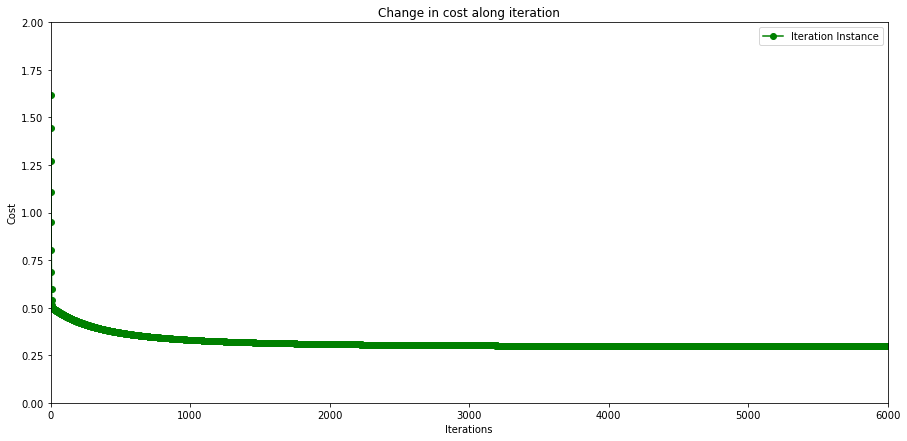

In [18]:
plt.figure(figsize=(15,7)) # must be declared first
plt.plot([i for i in range(len(cost_history))],cost_history,'go-',label='Iteration Instance')
plt.title('Change in cost along iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.xlim(0, 6000) #value limits 
plt.ylim(0, 2) #value limits

plt.show()

(0.0, 20.0)

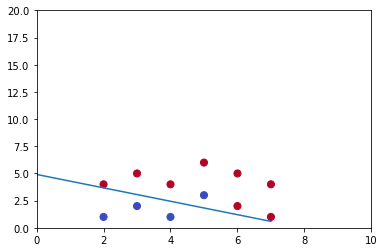

In [19]:
np
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.plot(db_x,db_y)
plt.xlim(0, 10) #value limits 
plt.ylim(0, 20) #value limits


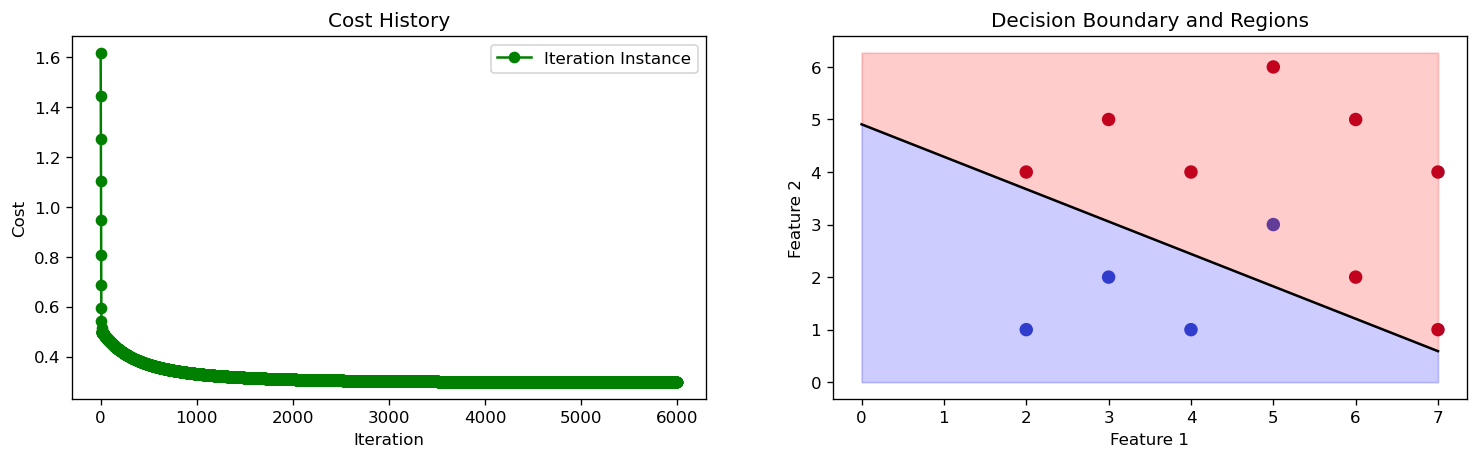

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), dpi=120)

# Plot the cost history (iterations vs cost)
ax1.plot([i for i in range(len(cost_history))], cost_history, 'go-', label='Iteration Instance')
ax1.set_title('Cost History')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

# Scatter plot of data points and decision boundary
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Data Points')

# Plot decision boundary
db_x = np.array(db_x)  # X coordinates of the decision boundary
db_y = np.array(db_y)  # Y coordinates of the decision boundary
ax2.plot(db_x, db_y, 'k-', label='Decision Boundary')

# Fill regions based on the decision boundary
# Above the boundary -> Class 1 Region
ax2.fill_between(db_x, db_y, y2=ax2.get_ylim()[1], color='red', alpha=0.2, label='Class 1 Region')
#fill from y1 to y2
# Below the boundary -> Class 2 Region
ax2.fill_between(db_x, db_y,   color='blue', alpha=0.2, label='Class 2 Region')
# Configure plot aesthetics
ax2.set_title('Decision Boundary and Regions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
# ax1.xlim(0,5000)
# ax1.ylim(0,2)
# ax1. 
# plt.tight_layout()
plt.show()


In [21]:
sales_data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [22]:
new_sales=sales_data[['Annual Income ($)','Family Size']]

spending_score=sales_data[['Spending Score (1-100)']]



#standardized values for training
X_mean=(new_sales.mean())
X_std=new_sales.std()
X_standardized=(new_sales-X_mean)/X_std

#transforming into numpy
X_train=X_standardized.to_numpy()
Y_train=spending_score.to_numpy()
Y_train=Y_train.reshape(-1)

In [49]:

numeric_data=sales_data.drop(['Profession','Gender'],axis=1)
# new_sales=sales_data[['Annual Income ($)','Work Experience']]
correlation_matrix=numeric_data.corr()
correlation_matrix

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Age,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.038254,0.093005,0.002232,0.011873,1.000000


In [ ]:

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,alpha=0.2,error_margin=0.01,iterations=1000)
plt.plot([i for i in range(len(cost_history))],cost_history,'b')
plt.show()

In [46]:
sales_data.drop?